In [63]:
import os
from io import StringIO
from tempfile import TemporaryDirectory

import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline, NcbiblastxCommandline, NcbimakeblastdbCommandline

In [2]:
querys = (
    '/media/GenomicResearch/MiSeq/Salmonella_enterica/Contigs/R17.4270.fa',
    '/media/GenomicResearch/MiSeq/Salmonella_enterica/Contigs/EB13.001.fa',
)

In [3]:
subjects = (
    '/media/GenomicResearch/Issue/20211026_沙鹿童綜合Sal/specific_gene/OmpC.fna',
    '/media/GenomicResearch/Issue/20211026_沙鹿童綜合Sal/specific_gene/OmpD.fna',
)

In [5]:
def make_blast_db(infile, outfile, dbtype):
    cline = NcbimakeblastdbCommandline(input_file=infile, out=outfile, dbtype=dbtype)
    cline()

In [20]:
make_blast_db(
    '/media/GenomicResearch/Issue/20211026_沙鹿童綜合Sal/specific_gene/Salmonella_enterica_porin_OmpD.faa',
    '/media/GenomicResearch/Issue/20211026_沙鹿童綜合Sal/specific_gene/Salmonella_enterica_porin_OmpD.faa',
    'prot'
)

In [45]:
query = '/media/GenomicResearch/MiSeq/Salmonella_enterica/Contigs/EB13.001.fa'
db = '/media/GenomicResearch/Issue/20211026_沙鹿童綜合Sal/specific_gene/Salmonella_enterica_porin_OmpC.faa'

cline = NcbiblastxCommandline(
    query=query,
    db=db,
    outfmt='6 qseqid sseqid pident length sstrand qstart qend qlen slen qseq bitscore',
    num_threads=8
    
)
stdout, stderr = cline()
result = pd.read_csv(StringIO(stdout), sep='\t', names=['qseqid', 'sseqid', 'pident', 'length', 'sstrand', 'qstart', 'qend', 'qlen', 'slen', 'qseq', 'bitscore'])
result['cov'] = (result['length']/result['slen']*100).round(2)

In [46]:
result[(result['pident']>=90)&(result['cov']>=60)].drop_duplicates(['qseqid', 'qstart', 'qend'])

,qseqid,sseqid,pident,length,sstrand,qstart,qend,qlen,slen,qseq,bitscore,cov
0,contig1|Assembly_SPAdes|EB13.001,QDF10915.1,100.000,383,NaN,779102,780250,1193379,383,MKRKVLALVIPALLAAGAAHAAEIYNKDGNKLDLYGKVDGLHYFSD...,736.0,100.00
128,contig1|Assembly_SPAdes|EB13.001,QBY22790.1,100.000,361,NaN,779168,780250,1193379,378,EIYNKDGNKLDLYGKVDGLHYFSDDSSKDGDQTYMRVGFKGETQIN...,734.0,95.50
200,contig1|Assembly_SPAdes|EB13.001,WP_223353790.1,98.995,398,NaN,250766,249573,1193379,398,MNRKVLALLVPALLVAGAANAAEIYNKNGNKLDLYGKVDGLRYFSD...,726.0,100.00
219,contig1|Assembly_SPAdes|EB13.001,ELP11773.1,100.000,349,NaN,723425,722379,1193379,372,EIYNKDGNKLDLYGKVDGLHYFSSNHSTDGDQSYIRMGIKGETQIT...,708.0,93.82
1445,contig26|Assembly_SPAdes|EB13.001,WP_058818783.1,100.000,356,NaN,204,1271,13555,378,EIYNKDGNKLDLFGKVDGLHYFSDDKGSDGDQTYMRIGFKGETQVN...,707.0,94.18


In [85]:
query = '/media/GenomicResearch/MiSeq/Salmonella_enterica/Contigs/R17.4270.fa'
subject = '/media/GenomicResearch/Issue/20211026_沙鹿童綜合Sal/specific_gene/Salmonella_enterica_porin_OmpC.fna'

cline = NcbiblastnCommandline(
    query=query,
    subject=subject,
    outfmt='6 qseqid sseqid pident length sstrand qstart qend qlen slen qseq bitscore',
    perc_identity=80,
)
stdout, stderr = cline()
result = pd.read_csv(StringIO(stdout), sep='\t', names=['qseqid', 'sseqid', 'pident', 'length', 'sstrand', 'qstart', 'qend', 'qlen', 'slen', 'qseq', 'bitscore'])
result['cov'] = (result['length']/result['slen']*100).round(2)

In [86]:
result = result[(result['cov']>=60)].drop_duplicates(['qseqid', 'qstart', 'qend'])
result

,qseqid,sseqid,pident,length,sstrand,qstart,qend,qlen,slen,qseq,bitscore,cov
0,contig1|Assembly_SPAdes|R17.4270,lcl|CP022963.1_cds_AYE23517.1_1,99.479,1152,plus,806188,807339,2023341,1152,ATGAAAAGAAAAGTATTGGCACTTGTCATCCCGGCTCTGCTGGCTG...,2095,100.0
1,contig1|Assembly_SPAdes|R17.4270,lcl|CP045458.1_cds_QIM82162.1_1,100.000,1119,minus,749474,750592,2023341,1119,TCAAAACTCGTAGACTAAGCCGAGCGCCACGGTGTTGTCTGTATTA...,2067,100.0
500,contig5|Assembly_SPAdes|R17.4270,lcl|CP017719.1_cds_ATW39275.1_1,100.000,1137,minus,12508,13644,387149,1137,TTAGAACTGGTAAACCAGACCCAGCGCTACGATGTCGTCGGTGTTG...,2100,100.0


In [82]:
result = result.drop(, axis=0)
result

,qseqid,sseqid,pident,length,sstrand,qstart,qend,qlen,slen,qseq,bitscore,cov
0,contig1|Assembly_SPAdes|R17.4270,lcl|CP045831.1_cds_QGG69448.1_1,100.0,1089,minus,701665,702753,2023341,1089,TTAGAACTGGTAGTTCAGACCAACAGCAACGATGTTGTCGGTAGAC...,2012,100.0


In [87]:
for idx, (_, row) in enumerate(result.iterrows(), 1):
    record_id = row.qseqid.split('|')[-1] + f'_OmpC-{idx}'
    start, end = row.qstart, row.qend
    seq = Seq(row.qseq)
    if row.sstrand == 'minus':
        seq = seq.reverse_complement()
    record = SeqRecord(seq, id=record_id, description=f'qseqid={row.qseqid};seqid={row.sseqid};start={start};end={end}')
    SeqIO.write(record, os.path.join('/media/GenomicResearch/Issue/20211201', record_id + '.fa'), 'fasta')

In [88]:
result.drop(['qseq', 'bitscore', 'sstrand'], axis=1).to_csv('/media/GenomicResearch/Issue/20211201/R17.4270_OmpC.out', sep='\t', index=False)

In [103]:
import subprocess
from io import BytesIO

In [109]:
import sys
sys.path.append('../../src')

from tree import PairwiseDistanceMatrix, Dendrogram

In [128]:
output = subprocess.check_output(['snp-dists', '-c', '/media/GenomicResearch/Issue/20211201/R17.4270_OmpC.prot.aln'])

In [129]:
dendrogram = Dendrogram(pd.read_csv(BytesIO(output), index_col=0))

In [130]:
dendrogram(show_node_info=True)

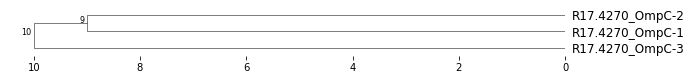

In [131]:
dendrogram.show_figure()